In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import csv
import time
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [3]:
# read data
df = pd.read_csv("sample_data.csv")
df = df.iloc[:,1:]
df.shape

(398, 8)

In [4]:
# get data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [5]:
# descirbe data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# check NA values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

### Exploratory Data Analysis

[Text(0.5, 0, 'acceleration'), Text(0, 0.5, 'mpg')]

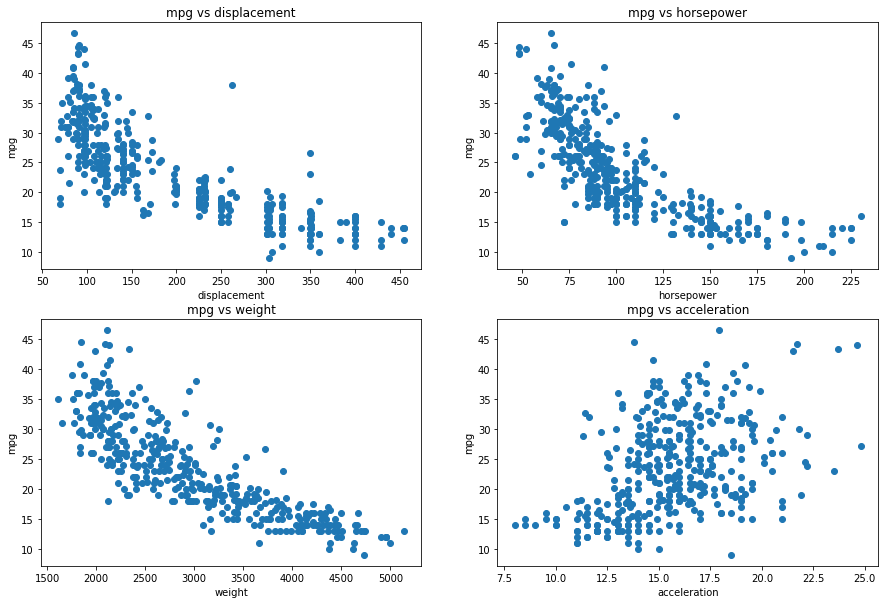

In [7]:
# data visualization
fig, axs = plt.subplots(nrows = 2,ncols =2, figsize = (15,10))

axs[0,0].scatter(df['displacement'], df['mpg'])
axs[0,0].set_title('mpg vs displacement')
axs[0,0].set(xlabel='displacement', ylabel='mpg')

axs[0,1].scatter(df['horsepower'], df['mpg'])
axs[0,1].set_title('mpg vs horsepower')
axs[0,1].set(xlabel='horsepower', ylabel='mpg')

axs[1,0].scatter(df['weight'], df['mpg'])
axs[1,0].set_title('mpg vs weight')
axs[1,0].set(xlabel='weight', ylabel='mpg')

axs[1,1].scatter(df['acceleration'], df['mpg'])
axs[1,1].set_title('mpg vs acceleration')
axs[1,1].set(xlabel='acceleration', ylabel='mpg')


<AxesSubplot:xlabel='origin', ylabel='mpg'>

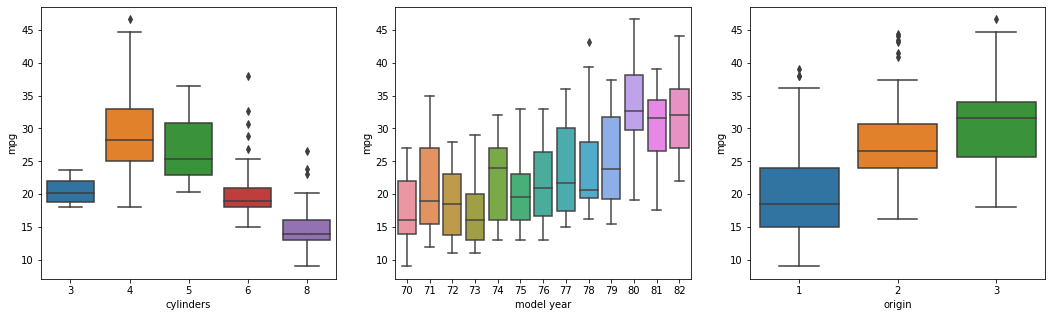

In [8]:
fig, axs = plt.subplots(nrows = 1,ncols =3, figsize = (18,5))

seabornInstance.boxplot(x='cylinders', y='mpg', data=df, ax=fig.axes[0])
seabornInstance.boxplot(x='model year', y='mpg', data=df, ax=fig.axes[1])
seabornInstance.boxplot(x='origin', y='mpg', data=df, ax=fig.axes[2])

In [9]:
# check correlation
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


We can see that cylinders, displacement, horsepower and weight share high correlation coefficients with each other.   
Cylinders and Displacement - 0.95   
Weight and Displacement - 0.93   
HP and Displacement - 0.89    
We can drop cylinders because of it's very high correlation with displacement. 

### Lasso Regression Model

In [10]:
# Get Parameters and Target 
#dms = pd.get_dummies(df[['origin']])
y = df["mpg"]
x = df.drop(['mpg', 'cylinders'], axis=1)

# define model- using default lambda value of 1
lasso_model = make_pipeline(StandardScaler(),Lasso(alpha=1.0))

In [11]:
# 20% training data
x_train20, x_test80, y_train20, y_test80 = train_test_split(x, y,
                                                            train_size=0.20,random_state=100)


# fit model
model_1a = lasso_model.fit(x_train20, y_train20)

# prediction
y_pred80 = model_1a.predict(x_test80)
print("Residual sum of squares", sum((y_pred80-y_test80)**2), "\n")
print("Mean Squared Error on prediction",np.sqrt(mean_squared_error(y_test80,y_pred80)),"\n")
print("R squared", r2_score(y_test80, y_pred80))

Residual sum of squares 5024.9217948986725 

Mean Squared Error on prediction 3.968892281244381 

R squared 0.7497881417542271


In [12]:
# 80% training data
x_train80, x_test20, y_train80, y_test20 = train_test_split(x, y,
                                                            train_size=0.80,random_state=101)

# fit model
model_1b = lasso_model.fit(x_train80, y_train80)

# prediction
y_pred20 = model_1b.predict(x_test20)
print("Residual sum of squares", sum((y_pred20-y_test20)**2), "\n")
print("Mean Squared Error on prediction",np.sqrt(mean_squared_error(y_test20,y_pred20)),"\n")
print("R squared", r2_score(y_test20, y_pred20))

Residual sum of squares 1077.9578231372764 

Mean Squared Error on prediction 3.6707591570703677 

R squared 0.7671749523499062


We have created the models for 2 types of training sets and observe that mean squared error and r squared values are almost similar. 

### Comparing models using AIC and BIC

In [13]:
# highligh min alpha value
def highlight_min_alpha(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


In [14]:
# Alpha tuning using AIC
# We will measure time also 
lasso_lars_aic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic", normalize=False))

# Model on 20% training set
start_time = time.time()
model_aic_2a = lasso_lars_aic.fit(x_train20, y_train20)
fit_time_aic_2a = time.time() - start_time

# saving the results
results_2a = pd.DataFrame(
    {
        "alphas": model_aic_2a[-1].alphas_,
        "AIC_criterion_20": model_aic_2a[-1].criterion_,
    }
).set_index("alphas")
alpha_aic_2a = model_aic_2a[-1].alpha_

# Alpha tuning using BIC
# We will measure time also 
lasso_lars_bic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="bic", normalize=False))

# Model on 20% training set
start_time = time.time()
model_bic_2a = lasso_lars_bic.fit(x_train20, y_train20)
fit_time_bic_2a = time.time() - start_time

# saving the results
results_2a["BIC_criterion_20"] = model_bic_2a[-1].criterion_
alpha_bic_2a = model_bic_2a[-1].alpha_


In [15]:
results_2a.style.apply(highlight_min_alpha)

,AIC_criterion_20,BIC_criterion_20
alphas,,
6.190637665193911,729.442522,729.442522
4.416581790765678,588.782330,591.151778
2.630695496451875,490.250699,494.989595
0.844324730206622,418.677468,425.785812
0.5432094844792763,414.887709,424.365501
0.37730922788990084,414.699938,426.547177
0.2049387890834534,413.044232,424.891471
0.005912909531144904,412.361871,424.209110
0.0,414.351348,428.568035


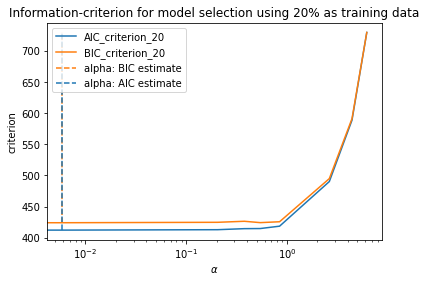

In [16]:
# Plotting the results
ax = results_2a.plot()
ax.vlines(
    alpha_bic_2a,
    results_2a["BIC_criterion_20"].min(),
    results_2a["BIC_criterion_20"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.vlines(
    alpha_aic_2a,
    results_2a["AIC_criterion_20"].min(),
    results_2a["AIC_criterion_20"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection using 20% as training data"
)

We see that for small training data AIC and BIC tuning for alpha gives almost same values. AIC and BIC both in the case are converging at the same alpha, so we will use that for our model.

In [17]:
# define model- using lambda from min aic and bic from above analysis
lasso_model_20 = make_pipeline(StandardScaler(),Lasso(alpha=alpha_aic_2a))

# fit model
model_2a = lasso_model_20.fit(x_train20, y_train20)

# prediction
y_pred80_2a = model_2a.predict(x_test80)
print("Residual sum of squares", sum((y_pred80_2a-y_test80)**2), "\n")
print("Mean Squared Error on prediction",np.sqrt(mean_squared_error(y_test80,y_pred80_2a)),"\n")
print("R squared", r2_score(y_test80, y_pred80_2a))

Residual sum of squares 3856.6550471352507 

Mean Squared Error on prediction 3.4770429583147666 

R squared 0.8079610259932197


In [18]:
# Alpha tuning using AIC

# Model on 80% training set
start_time = time.time()
model_aic_2b = lasso_lars_aic.fit(x_train80, y_train80)
fit_time_aic_2b = time.time() - start_time

# saving the results
results_2b = pd.DataFrame(
    {
        "alphas": model_aic_2b[-1].alphas_,
        "AIC_criterion_80": model_aic_2b[-1].criterion_,
    }
).set_index("alphas")
alpha_aic_2b = model_aic_2b[-1].alpha_

# Alpha tuning using BIC

# Model on 80% training set
start_time = time.time()
model_bic_2b = lasso_lars_bic.fit(x_train80, y_train80)
fit_time_bic_2b = time.time() - start_time

# saving the results
results_2b["BIC_criterion_80"] = model_bic_2b[-1].criterion_
alpha_bic_2b = model_bic_2b[-1].alpha_


In [19]:
results_2b.style.apply(highlight_min_alpha)

,AIC_criterion_80,BIC_criterion_80
alphas,,
6.495785043358148,3097.723324,3097.723324
3.932714506238795,2342.346955,2346.109007
1.8086246494163476,1824.499981,1832.024084
1.161620866815391,1744.475350,1755.761504
0.06257678637818519,1678.432972,1693.481178
0.048762371665284104,1678.240894,1697.051151
0.0,1676.349648,1698.921956


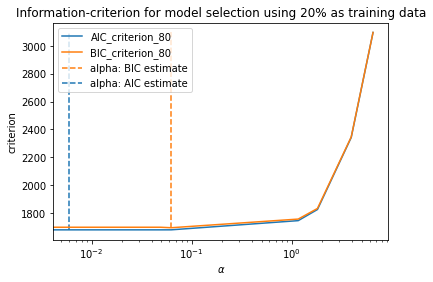

In [20]:
# Plotting the results
ax = results_2b.plot()
ax.vlines(
    alpha_bic_2b,
    results_2b["BIC_criterion_80"].min(),
    results_2b["BIC_criterion_80"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.vlines(
    alpha_aic_2a,
    results_2b["AIC_criterion_80"].min(),
    results_2b["AIC_criterion_80"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection using 20% as training data"
)

In case of larger training data, AIC and BIC are converging at different alpha values. AIC will in general try to find the model that most adequately defines the unknown parameter while BIC will try to determine the true model.  
We will go with alpha having the minimum BIC since BIC tries to arrive at the true model.

In [21]:
# define model- using lambda from min aic and bic from above analysis
lasso_model_80 = make_pipeline(StandardScaler(),Lasso(alpha=alpha_bic_2b))

# fit model
model_2b = lasso_model_80.fit(x_train80, y_train80)

# prediction
y_pred20_2b = model_2b.predict(x_test20)
print("Residual sum of squares", sum((y_pred20_2b-y_test20)**2), "\n")
print("Mean Squared Error on prediction",np.sqrt(mean_squared_error(y_test20,y_pred20_2b)),"\n")
print("R squared", r2_score(y_test20, y_pred20_2b))

Residual sum of squares 892.591510721909 

Mean Squared Error on prediction 3.34026853471751 

R squared 0.8072116955271336


In both the models, AIC/BIC are calculated in the in-sample training set. They penalize the over-optimistic error of different lasso models defined by different values of lambda, and this error is calculated on number of degrees of freedom and noise variance. An intelligent search is done between 2 values of alpha by scaling it up or down depending upon the interval gain or loss.

### Linear Regression using Cross Validation

In [22]:
# Linear regression with cross validation
linear_model = LinearRegression()

# 80% training data
x_train80, x_test20, y_train80, y_test20 = train_test_split(x, y,
                                                            train_size=0.80,random_state=102)

# fit model
model_3 = linear_model.fit(x_train80, y_train80)
# check the coefficients
print("Coefficients:")
print(pd.Series(model_3.coef_, index = x_train80.columns ),"\n")

# prediction
y_pred20_3 = model_3.predict(x_test20)
print("Residual sum of squares", sum((y_pred20_3-y_test20)**2), "\n")
#print("Mean Squared Error on prediction",np.sqrt(mean_squared_error(y_test20,y_pred20_3)),"\n")
print("R squared", r2_score(y_test20, y_pred20_3), "\n")


# run cross validation
scores = cross_validate(linear_model, x_train80, y_train80, cv=10,
                        scoring=('r2'),
                        return_train_score=True)

# keys
print("After Cross Validation")
print("Score Keys : ")
print(sorted(scores.keys()),"\n")

print("Train R Squared Values : ")
print(scores['train_score'],"\n")
print("Test R Squared Values : ")
print(scores['test_score'])

Coefficients:
displacement    0.013451
horsepower     -0.018283
weight         -0.006263
acceleration    0.046046
model year      0.775312
origin          1.652902
dtype: float64 

Residual sum of squares 900.8551508229376 

R squared 0.8322680391451895 

After Cross Validation
Score Keys : 
['fit_time', 'score_time', 'test_score', 'train_score'] 

Train R Squared Values : 
[0.81388625 0.81767515 0.80893413 0.81524514 0.8181299  0.80630765
 0.81728847 0.81101719 0.8171049  0.82165332] 

Test R Squared Values : 
[0.80806138 0.78325556 0.84081877 0.79507985 0.75791481 0.8947835
 0.75858447 0.83527082 0.7804133  0.75195468]


In [23]:
np.mean(scores['test_score'])

0.8006137144871831

R squared value from linear regression model is ~83%.   
After doing cross validation, we see that usually test r-sq values are lower than train r-sq values, which is expected since we are using 80% training data. But our original linear regression model is comparable to the mean r squared values of test scores we got from cross validation which means our model is neither under fitted nor over fitted. 

### Comparing all models

In [24]:
# define aic
def calculate_aic(n, sse, k):
    aic = n * np.log(sse/n) + 2 * k
    return aic

# define bic
def calculate_bic(n, sse, k):
    bic = n * np.log(sse/n) + k * np.log(n)
    return bic

def calculate_aicc(n,sse,k):
    aicc = n * np.log(sse/n) + (2 * k * n / (n - k - 1))
    return aicc

# number of params same across all models
k = 7

In [25]:
# Part 1 model on 20% data
print("20% training data :")
n = x_train20.shape[0]
sse = sum((y_pred80-y_test80)**2)
aic_1a_20 = calculate_aic(n,sse,k)
bic_1a_20 = calculate_bic(n,sse,k)
aicc_1a_20 = calculate_aicc(n,sse,k)
print("AIC - Part 1 model with default lambda:", round(aic_1a_20,2))
print("BIC - Part 1 model with default lambda:", round(bic_1a_20,2))
print("AICC - Part 1 model with default lambda:", round(aicc_1a_20,2),"\n")

# Part 2 model on 20% data
n = x_train20.shape[0]
sse = sum((y_pred80_2a-y_test80)**2)
aic_1a_20 = calculate_aic(n,sse,k)
bic_1a_20 = calculate_bic(n,sse,k)
aicc_1a_20 = calculate_aicc(n,sse,k)
print("AIC - Part 2 model with tuned lambda:", round(aic_1a_20,2))
print("BIC - Part 2 model with tuned lambda:", round(bic_1a_20,2))
print("AICC - Part 2 model with tuned lambda:", round(aicc_1a_20,2),"\n")

# Part 1 model on 80% data
print("80% training data :")
n = x_train80.shape[0]
sse = sum((y_pred20-y_test20)**2)
aic_1a_20 = calculate_aic(n,sse,k)
bic_1a_20 = calculate_bic(n,sse,k)
aicc_1a_20 = calculate_aicc(n,sse,k)
print("AIC - Part 1 model with default lambda:", round(aic_1a_20,2))
print("BIC - Part 1 model with default lambda:", round(bic_1a_20,2))
print("AICC - Part 1 model with default lambda:", round(aicc_1a_20,2),"\n")

# Part 2 model on 80% data
n = x_train80.shape[0]
sse = sum((y_pred20_2b-y_test20)**2)
aic_1a_20 = calculate_aic(n,sse,k)
bic_1a_20 = calculate_bic(n,sse,k)
aicc_1a_20 = calculate_aicc(n,sse,k)
print("AIC - Part 2 model with tuned lambda:", round(aic_1a_20,2))
print("BIC - Part 2 model with tuned lambda:", round(bic_1a_20,2))
print("AICC - Part 2 model with tuned lambda:", round(aicc_1a_20,2),"\n")


20% training data :
AIC - Part 1 model with default lambda: 342.06
BIC - Part 1 model with default lambda: 358.65
AICC - Part 1 model with default lambda: 343.64 

AIC - Part 2 model with tuned lambda: 321.16
BIC - Part 2 model with tuned lambda: 337.75
AICC - Part 2 model with tuned lambda: 322.74 

80% training data :
AIC - Part 1 model with default lambda: 1027.42
BIC - Part 1 model with default lambda: 1053.75
AICC - Part 1 model with default lambda: 1027.78 

AIC - Part 2 model with tuned lambda: 1065.68
BIC - Part 2 model with tuned lambda: 1092.02
AICC - Part 2 model with tuned lambda: 1066.04 



AIC, BIC and AICc are dependent on the number of sample data. So we can't compare models who are fitted on 20% and 80% training data with each other. SO we will compare them in categories only.    

For 20% training data   
AIC - part 2 model is better   
BIC - part 2 model is better    
AICc - part 2 model is better   

For 80% training data     
AIC - part 1 and part 2 are almost similar but part 1 is slightly better      
BIC - part 1 is better     
AICc - part 1 is better   

We also see that BIC is always more than AIC. That is because BIC applies a much higher penalty when the sample data is large and model is complex. For AIC we know, the penalty is 2 * number of parameters while for BIC penalty is ln(n) * number of parameters. When n is large, the penalty will be higher for BIC.      

For smaller training data, we can see that AICC is smaller than AIC while for large training data AICC and AIC are almost same. This happens because in case of smaller training data, AIC is biased in the sense that it is over fitted. That's why we use AICC to get more correct approximation for OOS deviance. 

